In [180]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [7]:
us_data = pd.read_csv('data/USvideos.csv')

In [11]:
us_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [75]:
df = us_data.groupby(by=['channel_title', 'video_id'])

In [76]:
df.first()

trending_date  \
channel_title          video_id                    
12 News                9KIP-Ncp2jU      17.15.11   
1MILLION Dance Studio  QRq0pkr2TWM      18.25.02   
                       WdOGSNQP9b4      18.08.03   
                       XKl8Wg25DrM      18.14.04   
                       _xwX82Y0Oro      18.01.03   
...                                          ...   
ワーナー ブラザース 公式チャンネル     QF031DwMffQ      17.03.12   
圧倒的不審者の極み!             MeNR0guNn70      18.05.03   
杰威爾音樂 JVR Music        MAjY8mCTXWk      18.15.05   
郭韋辰                    smRlXuBcp3c      17.07.12   
영국남자 Korean Englishman VioegwSjypk      18.04.01   

                                                                                title  \
channel_title          video_id                                                         
12 News                9KIP-Ncp2jU  Bill Gates bought land in Arizona to build tec...   
1MILLION Dance Studio  QRq0pkr2TWM        Cheap Thrills - Sia / Tina Boo Choreography   
                       WdOGSNQP9b4  This is me - The Greatest Showman OST / Jun Li...   
                       XKl8Wg25DrM  Joga O Bum Bum Tam Tam - MC Fioti / Rikimaru C...   
                       _xwX82Y0Oro  FRIENDS - Marshmello & Anne-Marie / Tina Boo C...   
...                                                                               ...   
ワーナー ブラザース 公式チャンネル     QF031DwMffQ    『ニンジャバットマン』 New York Comic Con公開映像【2018年劇場公開予定】   
圧倒的不審者の極み!             MeNR0guNn70                               世界で一番切れるパスタの包丁を作りたい！   
杰威爾音樂 JVR Music        MAjY8mCTXWk  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...   
郭韋辰                    smRlXuBcp3c  2017-11-30-中國文化大學彩虹縮時(Taiwan,Taipei,CCU)   Thr...   
영국남자 Korean Englishman VioegwSjypk               한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!   

                                    category_id              publish_time  \
channel_title          video_id                                             
12 News                9KIP-Ncp2jU           22  2017-11-11T01:03:01.000Z   
1MILLION Dance Studio  QRq0pkr2TWM           24  2018-02-19T12:00:02.000Z   
                       WdOGSNQP9b4           24  2018-03-07T12:00:04.000Z   
                       XKl8Wg25DrM           24  2018-04-10T12:00:05.000Z   
                       _xwX82Y0Oro           24  2018-02-28T09:00:03.000Z   
...                                         ...                       ...   
ワーナー ブラザース 公式チャンネル     QF031DwMffQ            1  2017-12-01T09:06:02.000Z   
圧倒的不審者の極み!             MeNR0guNn70           28  2018-03-03T16:16:15.000Z   
杰威爾音樂 JVR Music        MAjY8mCTXWk           10  2018-05-14T15:59:47.000Z   
郭韋辰                    smRlXuBcp3c           28  2017-11-30T16:44:51.000Z   
영국남자 Korean Englishman VioegwSjypk           23  2018-01-03T11:31:18.000Z   

                                                                                 tags  \
channel_title          video_id                                                         
12 News                9KIP-Ncp2jU  Arizona|"Bill gates"|"land"|"tech city"|"smart...   
1MILLION Dance Studio  QRq0pkr2TWM  choreography|"1million dance studio"|"원밀리언 댄스 ...   
                       WdOGSNQP9b4  choreography|"1million dance studio"|"원밀리언 댄스 ...   
                       XKl8Wg25DrM  choreography|"1million dance studio"|"원밀리언 댄스 ...   
                       _xwX82Y0Oro  choreography|"1million dance studio"|"원밀리언 댄스 ...   
...                                                                               ...   
ワーナー ブラザース 公式チャンネル     QF031DwMffQ  ニンジャバットマン|"batman ninja"|"batman"|"神風動画"|"水﨑淳平...   
圧倒的不審者の極み!             MeNR0guNn70  kiwami|"作ってみた"|"作り方"|"作成"|"作製"|"自作"|"How"|"to"...   
杰威爾音樂 JVR Music        MAjY8mCTXWk  周杰倫|"Jay"|"Chou"|"周董"|"周杰伦"|"周傑倫"|"杰威尔"|"周周"|"...   
郭韋辰                    smRlXuBcp3c                                             [none]   
영국남자 Korean Englishman VioegwSjypk  Korean|"영국남자"|"영국"|"조쉬"|"올리"|"Josh"|"Ollie"|"K...   

                                     vie

In [73]:
channel = us_data.groupby("channel_title").get_group("12 News")

In [74]:
channel

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
318,9KIP-Ncp2jU,17.15.11,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11T01:03:01.000Z,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",85643,170,45,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg,False,False,False,Philanthropist and inventor Bill Gates paid $...
555,9KIP-Ncp2jU,17.16.11,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11T01:03:01.000Z,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",92327,182,45,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg,False,False,False,Philanthropist and inventor Bill Gates paid $...


In [82]:
def get_channel_info(channel_name, data):
    channel = data.groupby("channel_title").get_group(channel_name)
    return channel

In [83]:
get_channel_info('12 News', us_data)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
318,9KIP-Ncp2jU,17.15.11,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11T01:03:01.000Z,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",85643,170,45,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg,False,False,False,Philanthropist and inventor Bill Gates paid $...
555,9KIP-Ncp2jU,17.16.11,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11T01:03:01.000Z,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",92327,182,45,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg,False,False,False,Philanthropist and inventor Bill Gates paid $...


In [91]:
def generate_tags_count_dict(data):
    tags = data['tags']
    tags_count_dict = {}
    for line in tags:
        line = line.lower()
        line = line.split("|")
        for word in line:
            word = re.sub("(\")","",word)
            if word not in tags_count_dict.keys():
                tags_count_dict[word] = 0
            tags_count_dict[word] = tags_count_dict[word] + 1
    return tags_count_dict

In [188]:
tags_count_dict = generate_tags_count_dict(us_data)

In [137]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [156]:
def generate_info_dict(data):
    info = {}
    info['count'] = len(data)
    info['most_pop_video'] = data.sort_values(by='views', ascending=False).iloc[0]['video_id']
    info['max_views'] = data.sort_values(by='views', ascending=False).iloc[0]['views']
    info['total_views'] = sum(data['views'])
    info['avg_views'] = data['views'].mean()
    info['max_likes'] = data.sort_values(by='likes', ascending=False).iloc[0]['likes']
    info['total_likes'] = sum(data['likes'])
    info['avg_likes'] = data['likes'].mean()
    info['total_dislikes'] = sum(data['dislikes'])
    info['avg_dislikes'] = data['dislikes'].mean()
    info['total_comment'] = sum(data['comment_count'])
    info['avg_comment'] = data['comment_count'].mean()
    return info

In [148]:
def generate_channel_dict(data):
    channel_tags_dict = {}
    channel_video_dict = {}
    channel_category_dict = {}
    channel_info_dict = {}
    channel_list = set(data['channel_title'])
    for channel in channel_list:
        channel_data = data.groupby("channel_title").get_group(channel)
        channel_info_dict[channel] = generate_info_dict(channel_data)
        channel_video_dict[channel] = channel_data['video_id'].tolist()
        channel_tags_dict[channel] = generate_tags_count_dict(channel_data)
        channel_category_dict[channel] = set(channel_data['category_id'])
    return channel_info_dict, channel_tags_dict, channel_video_dict, channel_category_dict

In [149]:
channel_info_dict, channel_tags_dict, channel_video_dict, channel_category_dict = generate_channel_dict(us_data)

In [157]:
def generate_category_dicts(data):
    category_tags_dict = {}
    category_video_dict = {}
    category_channel_dict = {}
    category_info_dict = {}
    category_list = set(data['category_id'])
    print(category_list)
    for category_id in category_list:
        cate_data = data.groupby("category_id").get_group(category_id)
        category_info_dict[category_id] = generate_info_dict(cate_data)
        category_video_dict[category_id] = cate_data['video_id'].tolist()
        category_tags_dict[category_id] = generate_tags_count_dict(cate_data)
        category_channel_dict[category_id] = set(cate_data['channel_title'])
        #data = data.groupby("category_id").get_group(category_id)
    return category_info_dict, category_tags_dict, category_video_dict, category_channel_dict

In [158]:
cate_info, cate_tag, cate_video, cate_channel = generate_category_dicts(us_data)

{1, 2, 10, 43, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29}


In [159]:
cate_info

{1: {'count': 2345,
  'most_pop_video': 'ulNswX3If6U',
  'max_views': 54863912,
  'total_views': 7284156721,
  'avg_views': 3106250.2008528784,
  'max_likes': 922355,
  'total_likes': 165997476,
  'avg_likes': 70787.83624733475,
  'total_dislikes': 6075148,
  'avg_dislikes': 2590.68144989339,
  'total_comment': 17887060,
  'avg_comment': 7627.744136460555},
 2: {'count': 384,
  'most_pop_video': 'cqg5oc20nxk',
  'max_views': 25244097,
  'total_views': 520690717,
  'avg_views': 1355965.4088541667,
  'max_likes': 97030,
  'total_likes': 4245656,
  'avg_likes': 11056.395833333334,
  'total_dislikes': 243010,
  'avg_dislikes': 632.8385416666666,
  'total_comment': 784447,
  'avg_comment': 2042.8307291666667},
 10: {'count': 6472,
  'most_pop_video': 'VYOjWnS4cMY',
  'max_views': 225211923,
  'total_views': 40132892190,
  'avg_views': 6201003.119592089,
  'max_likes': 5613827,
  'total_likes': 1416838584,
  'avg_likes': 218918.19901112485,
  'total_dislikes': 51179008,
  'avg_dislikes': 790

In [160]:
us_data['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40944    18.14.06
40945    18.14.06
40946    18.14.06
40947    18.14.06
40948    18.14.06
Name: trending_date, Length: 40949, dtype: object

['1', '2', '10', '43', '15', '17', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29']
[54863912, 25244097, 225211923, 1445949, 6187457, 29090799, 23932421, 16935442, 56111957, 29178096, 149376127, 10277358, 54155921, 7349435, 42799458, 24286474]


Text(0.5, 0, 'category_id')

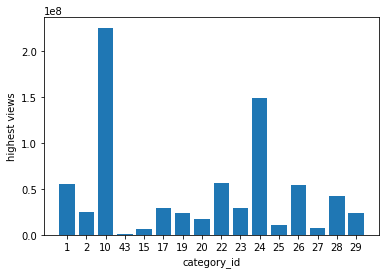

In [173]:
max_view_list = []
category = []
for item in cate_info.items():
    max_view_list.append(item[1]['max_views'])
    category.append(str(item[0]))
print(category)
print(max_view_list)
plt.bar(category, max_view_list)
plt.ylabel("highest views")
plt.xlabel("category_id")

['1', '2', '10', '43', '15', '17', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29']
[2345, 384, 6472, 57, 920, 2174, 402, 817, 3210, 3457, 9964, 2487, 4146, 1656, 2401, 57]


Text(0.5, 0, 'category_id')

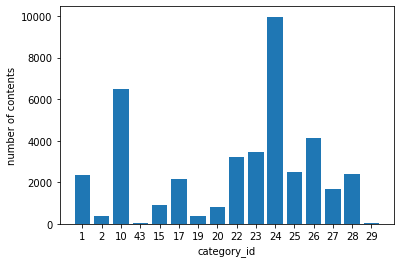

In [176]:
count_list = []
category = []
for item in cate_info.items():
    count_list.append(item[1]['count'])
    category.append(str(item[0]))
plt.bar(category, count_list)
plt.ylabel("number of contents")
plt.xlabel("category_id")

Text(0.5, 0, 'average likes')

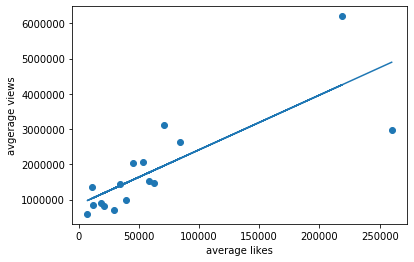

In [187]:
view_list = []
like_list = []
for item in cate_info.items():
    view_list.append(item[1]['avg_views'])
    like_list.append(item[1]['avg_likes'])
view_list = np.array([round(num) for num in view_list])
like_list = np.array([round(num) for num in like_list])
plt.scatter(like_list, view_list)
m,b = np.polyfit(like_list, view_list, 1)
plt.plot(like_list, m*like_list + b)
plt.ylabel("avgerage views")
plt.xlabel("average likes")

In [203]:
def generate_top_tag_each_category_chart(cate_tag):
    category = []
    tag = []
    tag_count = []
    for item in cate_tag.items():
        category.append(str(item[0]))
        sorted_d = sorted(item[1].items(), key=lambda x:x[1], reverse=True)
        tag.append(sorted_d[0][0])
        tag_count.append(sorted_d[0][1])
    top_tag_each_category = pd.DataFrame(list(zip(tag, tag_count)), index=category, columns=['tag', 'counts'])
    return top_tag_each_category

In [204]:
generate_top_tag_each_category_chart(cate_tag)

,tag,counts
1,trailer,642
2,doug demuro,60
10,pop,1511
43,bleacher report,41
15,animals,428
17,sports,552
19,travel,100
20,gameplay,148
22,buzzfeed,490
23,funny,1436
